In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications import *
import os
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir=r"Dataset/test"
Action=[]
for file in os.listdir(data_dir):
    Action+=[file]
print(Action)
print(len(Action))

['false', 'true']
2


In [3]:
img_height,img_width=224,224
batch_size=20

In [4]:
train="Dataset/train/"
test="Dataset/test/"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                )
test_generator = train_datagen.flow_from_directory(test,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                )

Found 4438 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 96)       

In [7]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_generator,epochs=20,validation_data=test_generator,verbose=1)


Epoch 1/20


222/222 [==============================] - 243s 1s/step - loss: 0.7125 - accuracy: 0.5397 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/20
222/222 [==============================] - 205s 923ms/step - loss: 0.6633 - accuracy: 0.5910 - val_loss: 0.6083 - val_accuracy: 0.6580
Epoch 3/20
222/222 [==============================] - 187s 845ms/step - loss: 0.6136 - accuracy: 0.6629 - val_loss: 0.5852 - val_accuracy: 0.6706
Epoch 4/20
222/222 [==============================] - 178s 801ms/step - loss: 0.5799 - accuracy: 0.6884 - val_loss: 0.5672 - val_accuracy: 0.6858
Epoch 5/20
222/222 [==============================] - 187s 840ms/step - loss: 0.5608 - accuracy: 0.7102 - val_loss: 0.5544 - val_accuracy: 0.7074
Epoch 6/20
222/222 [==============================] - 201s 906ms/step - loss: 0.5402 - accuracy: 0.7177 - val_loss: 0.5656 - val_accuracy: 0.7145
Epoch 7/20
222/222 [==============================] - 233s 1s/step - loss: 0.5118 - accuracy: 0.7395 - val_loss: 0.5410 - va

In [8]:
model.save("models/MOBILENET.h5")

C:\Users\0618\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


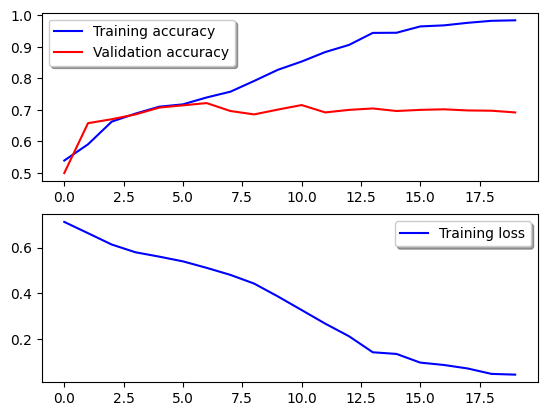

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[1].legend(loc='best', shadow=True)